In [17]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [139]:
df = pd.read_csv("covid-19-data/us-counties.csv")

In [163]:
cook_counties = ((df["county"]=="Cook") & (df["state"]=="Illinois"))

In [165]:
cook_county = df[cook_counties]

In [166]:
cook_county_firstDeath = cook_county["deaths"] > 0

In [167]:
cook_firstDeath = cook_county[cook_county_firstDeath]

Text(0.5, 1.0, 'Total Deaths')

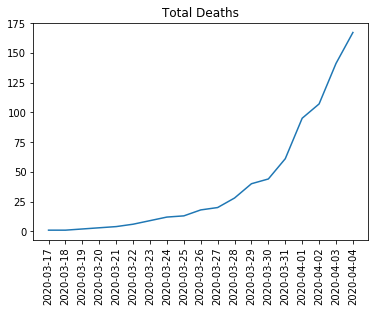

In [179]:
plt.plot(cook_firstDeath["date"], cook_firstDeath["deaths"])
plt.xticks(rotation="90")
plt.title("Total Deaths")

<ul>Plot the number of cases from when the number of cases were greather than 50</ul>

In [175]:
cook_county_firstCase = cook_county["cases"]>50

In [176]:
cook_firstCase = cook_county[cook_county_firstCase]

Text(0.5, 1.0, 'Total Cases')

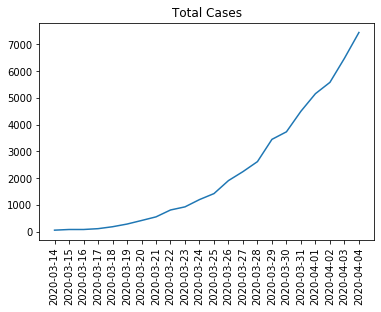

In [209]:
plt.plot(cook_firstCase["date"], cook_firstCase["cases"])
plt.xticks(rotation = "90")
plt.title("Total Cases")

<h4>Get date of largest increase in death</h4>

In [208]:
i = 0
max_deaths = 0
diff = 0
for index, row in cook_county.iterrows():
    if i != 0 and cook_county.loc[index, "deaths"] != 0:
        diff = cook_county.loc[index, "deaths"] - cook_county.loc[prev_index, "deaths"]
        if (diff >= max_deaths):
            if (diff == max_deaths):
                max_date = str(max_date) + ", " + str(cook_county.loc[index, "date"])
            else:
                max_date = cook_county.loc[index, "date"]
            max_deaths = diff
            
    if cook_county.loc[index, "deaths"] != 0 or i == 0:
        prev_index = index
    i = i + 1
print("\nMax deaths in one day: " + str(max_deaths))
print("\nDate of max deaths: " + str(max_date)+"\n")


Max deaths in one day: 34

Date of max deaths: 2020-04-01, 2020-04-03



<h4>Get the past week's numbers</h4>

In [202]:
print("\nThe past week's numbers\n")
print(cook_county[-7:])
print("\n")


The past week's numbers

             date county     state     fips  cases  deaths
18166  2020-03-29   Cook  Illinois  17031.0   3445      40
20181  2020-03-30   Cook  Illinois  17031.0   3727      44
22287  2020-03-31   Cook  Illinois  17031.0   4496      61
24468  2020-04-01   Cook  Illinois  17031.0   5152      95
26708  2020-04-02   Cook  Illinois  17031.0   5575     107
29011  2020-04-03   Cook  Illinois  17031.0   6473     141
31375  2020-04-04   Cook  Illinois  17031.0   7439     167




<h4>Total deaths overnight</h4>

In [190]:
total_overnight_deaths = cook_county.iloc[-1]["deaths"] - cook_county.iloc[-2]["deaths"]

In [193]:
print("Total overnight deaths :( = " + str(total_overnight_deaths))

Total overnight deaths :( = 26
